In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import data using datetime and set index to datetime
df = pd.read_csv(r'C:\Users\91783\Desktop\subham\H_Ankl_1_2_19-3_12_22-_41_ (copy)_INDEX_Mean.csv',
                                parse_dates=['Date'],
                                index_col=['Date'])

df.head()

,PM25
Date,
2019-04-02 18:00:00,70.52
2019-04-02 19:00:00,61.39
2019-04-02 20:00:00,59.94
2019-04-02 21:00:00,76.44
2019-04-02 22:00:00,98.54


In [3]:
#Mean - missed value first put None to NaN in dataset
import numpy as np
def change1(a):
  df[a] = df[a].replace(np.NaN, df[a].mean())

In [4]:
#PM2.5	PM10	NO2	SO2	CO	Ozone	Temp	RH	WS	WD	SR
#l=["PM2.5"]
#for i in l:
#  change1(i)

KeyError: 'PM2.5'

In [6]:
df.tail()

,PM25
Date,
2022-02-12 20:00:00,120.98
2022-02-12 21:00:00,115.37
2022-02-12 22:00:00,104.06
2022-02-12 23:00:00,110.59
2022-03-12 00:00:00,122.87


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33535 entries, 2019-04-02 18:00:00 to 2022-03-12 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    33535 non-null  float64
dtypes: float64(1)
memory usage: 524.0 KB


<AxesSubplot:>

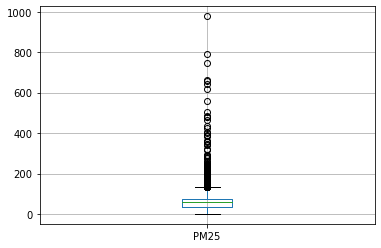

In [8]:
#Box plot
#pd.options.display.mpl_style = False
df.boxplot()

In [9]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [10]:
scaled_dataset[:2,:]

array([[0.07166694],
       [0.06232086]])

In [11]:
#Creating a window for previous data
def to_supervised(train):
    window_size = 4
    X = []
    Y = []
    for i in range(window_size, len(train)):
        X.append(train[i-window_size:i,:])
        Y.append(train[i,0:1])
    
    return X,Y

In [12]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (33531, 1)
X (33531, 4, 1)


In [13]:
#Splitting the dataset
n_train = 3*30
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (33441, 4, 1)
X_test (90, 4, 1)
Y_train (33441, 1)
Y_test (90, 1)


In [14]:
#Importing LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')   

In [15]:
history = model.fit(X_train, Y_train, epochs=50,
                    batch_size=8, validation_data=(X_test, Y_test),
                    verbose=2, shuffle=False)

Epoch 1/50
4181/4181 - 25s - loss: 5.5265e-04 - val_loss: 2.5452e-04 - 25s/epoch - 6ms/step
Epoch 2/50
4181/4181 - 18s - loss: 3.4570e-04 - val_loss: 1.4457e-04 - 18s/epoch - 4ms/step
Epoch 3/50
4181/4181 - 19s - loss: 3.4185e-04 - val_loss: 1.0194e-04 - 19s/epoch - 5ms/step
Epoch 4/50
4181/4181 - 21s - loss: 3.2994e-04 - val_loss: 1.5114e-04 - 21s/epoch - 5ms/step
Epoch 5/50
4181/4181 - 18s - loss: 3.2554e-04 - val_loss: 1.3293e-04 - 18s/epoch - 4ms/step
Epoch 6/50
4181/4181 - 20s - loss: 3.2981e-04 - val_loss: 1.0267e-04 - 20s/epoch - 5ms/step
Epoch 7/50
4181/4181 - 19s - loss: 3.2674e-04 - val_loss: 9.6414e-05 - 19s/epoch - 5ms/step
Epoch 8/50
4181/4181 - 18s - loss: 3.2122e-04 - val_loss: 1.3059e-04 - 18s/epoch - 4ms/step
Epoch 9/50
4181/4181 - 19s - loss: 3.1542e-04 - val_loss: 1.2851e-04 - 19s/epoch - 5ms/step
Epoch 10/50
4181/4181 - 19s - loss: 3.1990e-04 - val_loss: 1.0920e-04 - 19s/epoch - 5ms/step
Epoch 11/50
4181/4181 - 18s - loss: 3.1382e-04 - val_loss: 1.2705e-04 - 18s/epo

In [16]:
#Taking predictions
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

print(mse)
rmse = np.sqrt(mse)
print(rmse)

3/3 [==============================] - 12s 84ms/step
0.00016722571531218406
0.012931578222018535


In [17]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print('MAPE', mape)

MAPE 23.195929882585922


In [18]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print('MAPE', mape)

MAPE 23.195929882585922


In [19]:
#Y_predicted = scaler.inverse_transform(Y_pred)
print('y_predicted',Y_pred.shape)
#print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', scaled_dataset.shape)

y_predicted (90, 1)
X_test (90, 4, 1)
scaled Values shape (33535, 1)


In [20]:
#Scaling back to the original scale
d = scaled_dataset[:271,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:90,1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:90,1:]), axis = 1)
print('concat Y_test', Y_test.shape)

dummy (271, 1)
Y_pred (90, 1)
concat y_pred (90, 1)
concat Y_test (90, 1)


In [21]:
#Take inverse transform
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (90, 1)
Y_predicted (90, 1)


In [22]:
#Calculate error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

159.58258613354764
12.632600133525466


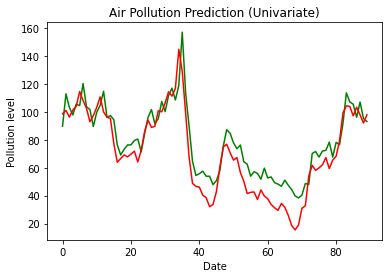

In [23]:
#Plot the graph between actual vs predicted values
plt.plot(Y_predicted[:100,:], color= 'green')
plt.plot(Y_tested[:100,:] , color = 'red')
plt.title("Air Pollution Prediction (Univariate)")
plt.xlabel("Date")
plt.ylabel("Pollution level")
plt.show()
 

In [24]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
print('MAPE', mape)

MAPE 22.846631329862337


In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
#print('Mean squared error', mse)
print('RMSE' , np.sqrt(mse))
print("Mean of Test data ", np.mean(Y_tested))

RMSE 12.632600133525466
Mean of Test data  71.81955555555555


array([<AxesSubplot:xlabel='Date'>], dtype=object)

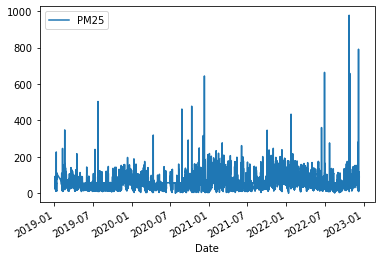

In [26]:
# A simple plot to visualize the correlation between the columns
df.plot(subplots=True)
#df.plot(subplots=True,figsize=(15,13));

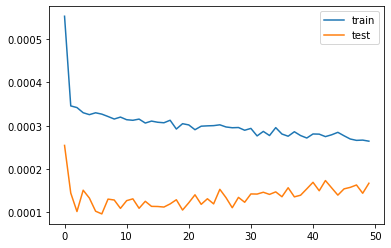

In [27]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
 